In [31]:
import numpy as np
import matplotlib.pyplot as plt
import random
try:
    import importlib
    importlib.reload(h)
    importlib.reload(f)
    importlib.reload(d)
except NameError: # It hasn't been imported yet
    import helpers as h
    import implementations as f
    import data_processing as d

# Data preprocessing and feature selections

## Data preprocessing

#For this to work, the data folder needs to be one level above the project folder and the folder name needs
#to be 'data'
data_folder = '../data/'
x_train, x_test, y_train, train_ids, test_ids = h.load_csv_data(data_folder)


In [2]:
np.random.seed(0)

In [3]:
x_train, x_test, y_train, train_ids, test_ids = h.load_csv_data("../data")

In [4]:
np.save('../data/y_train.npy', y_train)
np.save('../data/x_train.npy', x_train)
np.save('../data/x_test.npy', x_test)
np.save('../data/train_ids.npy', train_ids)
np.save('../data/test_ids.npy', test_ids)

In [3]:
x_train = np.load("../data/x_train.npy")
x_test = np.load("../data/x_test.npy")
y_train = np.load("../data/y_train.npy")
train_ids = np.load("../data/train_ids.npy")
test_ids = np.load("../data/test_ids.npy")

In [4]:
#features_named all the features names and remove the ID column
features_name = np.genfromtxt('../data/x_train.csv', delimiter=',', dtype=str, max_rows=1)[1:] 
features_name

array(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENUM', 'PVTRESD1', 'COLGHOUS', 'STATERES',
       'CELLFON3', 'LADULT', 'NUMADULT', 'NUMMEN', 'NUMWOMEN', 'CTELNUM1',
       'CELLFON2', 'CADULT', 'PVTRESD2', 'CCLGHOUS', 'CSTATE', 'LANDLINE',
       'HHADULT', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH',
       'HLTHPLN1', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'BPHIGH4', 'BPMEDS',
       'BLOODCHO', 'CHOLCHK', 'TOLDHI2', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW',
       'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3', 'ADDEPEV2',
       'CHCKIDNY', 'DIABETE3', 'DIABAGE2', 'SEX', 'MARITAL', 'EDUCA',
       'RENTHOM1', 'NUMHHOL2', 'NUMPHON2', 'CPDEMO1', 'VETERAN3',
       'EMPLOY1', 'CHILDREN', 'INCOME2', 'INTERNET', 'WEIGHT2', 'HEIGHT3',
       'PREGNANT', 'QLACTLM2', 'USEEQUIP', 'BLIND', 'DECIDE', 'DIFFWALK',
       'DIFFDRES', 'DIFFALON', 'SMOKE100', 'SMOKDAY2', 'STOPSMK2',
       'LASTSMK2', 'USENOW3', 'ALCDAY5', 'AVEDRNK2', 'DRNK3GE5',
    

In [6]:
features_name[26]

'GENHLTH'

## Feature selection

one paper on internet suggests to use these features : 

 _RFHYPE5, TOLDHI2, _CHOLCHK, _BMI5, SMOKE100, CVDSTRK3, DIABETE3, _TOTINDA, _FRTLT1, _VEGLT1, _RFDRHV5, HLTHPLN1, MEDCOST, GENHLTH, MENTHLTH, PHYSHLTH, DIFFWALK, SEX, _AGEG5YR, EDUCA, and INCOME2

We apply a mask to get only these important features.

Then using we use our preprocessing function. For feature where the answer is yes or no we make the data binary, ordinal (categorical) variables ares changed to 0,1,2,...,Missing values are replace by the mean of the column.


In [37]:
#Select the important features
features_list = ['_RFHYPE5', 'TOLDHI2', '_CHOLCHK', '_BMI5', 'SMOKE100', 'CVDSTRK3', 'DIABETE3', '_TOTINDA', '_FRTLT1', '_VEGLT1', '_RFDRHV5', 
                 'HLTHPLN1', 'MEDCOST', 'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK', 'SEX', '_AGEG5YR', 'EDUCA', 'INCOME2', ]


In [38]:
trainMask, testMask = f.masking((x_train, x_test), features_name, features_list)
trainProcessed = d.feature_processing_test(trainMask)

#Test data Processing 
testProcessed  = d.feature_processing_test(testMask)



x_train_algo = f.replaceMissingValuesMean(trainMask)
x_test_algo = f.replaceMissingValuesMean(testMask)


yo
328135


In [46]:
heart_dis = x_train_algo[y_train == 1]
non_hd = x_train_algo[y_train == -1]

random_indices_nonhd = np.random.choice(range(len(non_hd)), len(heart_dis), replace=False)

train_sample = np.concatenate((heart_dis, non_hd[random_indices_nonhd]), axis=0)
train_sample.shape

(57950, 21)

In [61]:
y_train_sample = np.concatenate((np.ones(len(heart_dis)), -np.ones(len(heart_dis))), axis=0)

#shuffle both train_sample and y_train_sample the same way

shuffle_indices = np.random.permutation(len(train_sample))
train_sample = train_sample[shuffle_indices]
y_train_sample = y_train_sample[shuffle_indices]

print(train_sample.shape, y_train_sample.shape)

(57950, 21) (57950,)


In [41]:
##test chelou
x1=x_train_algo[:,1]
x2=x_train_algo[:,2]
x1_stand=f.standardize(x1)
x2_stand=f.standardize(x2)

# Processing 

### Now that the preprocessing has been done, we can format the data to be used by the algorithms

In [62]:
tX_train = np.c_[np.ones((len(train_sample), 1)), train_sample]
tX_test = np.c_[np.ones((len(x_test_algo), 1)), x_test_algo]

### Initialisation of set parameters

In [63]:
initial_w = [random.choice([1, -1]) for i in range(len(tX_train[0]))]
max_iter = 500

### Separation of the dataset in a test/train set

In [64]:
tX_train_train = tX_train[:int(len(tX_train)*0.7)]
y_train_train = y_train_sample[:int(len(tX_train)*0.7)]
tX_train_test = tX_train[int(len(tX_train)*0.7):]
y_train_test = y_train_sample[int(len(tX_train)*0.7):]

## Plotting functions

In [11]:
def loss_progression(w):
    # Plot progression of the weights in function of the iteration and progression on the test set
    plt.figure(0)
    plt.plot(w)

## And then, we can run the algorithms

In [12]:
def plotLossMSE(weights, loss, y, x ):
    loss_test_set = []

    for w in weights:
        loss_test_set.append(f.compute_mse(y, x, w))

    plt.figure(0)
    plt.semilogy(loss)
    plt.semilogy(loss_test_set)
    plt.show()


1. MSE gradient descent

In [65]:
#Compute gradient descent with MSE as loss function (see functions.py for the function)

w_mse_gd, loss_mse_gd = f.mean_squared_error_gd(y_train_train, tX_train_train, initial_w, 4000, 0.001)

Gradient Descent(3999/4000): Final loss=0.5468254528464432


In [27]:
loss_test_set = []

for w in w_mse_gd:
    loss_test_set.append(f.compute_mse(y_train_test, tX_train_test, w))

In [ ]:
plt.figure(0)
plt.semilogy(loss_mse_gd)
plt.semilogy(loss_test_set)
plt.show()

In [70]:
y_pred = tX_train_test.dot(w_mse_gd[-1, :])
y_pred = np.where(y_pred > 0, 1, -1)

_,_,_,_,f1 = f.confusion_matrix(y_train_test, y_pred)

print("Accuracy: ", np.sum(y_pred == y_train_test)/len(y_train_test))
print("F1 score: ", f1)


Accuracy:  0.6754673569168824
F1 score:  0.6756725684065302


In [ ]:
#h.create_csv_submission(test_ids, y_test_rounded, 'submission_gd.csv')

In [73]:
#Test the model on the test sample. Do we need to standardize ?

y_test = tX_test.dot(w_mse_gd[-1, :])
y_test_rounded = np.where(y_test > 0, 1, -1) 

print('weights = \n\n', w_mse_gd[-1, :],'\n\n Loss = ', loss_mse_gd[-1],'\n\n*****************************************************************************',
      ' \n\n Train sample : \n', 'Heart attack rate = ', np.count_nonzero(y_train == 1)/len(y_train), '\n \n Test sample : \n', 'Heart attack rate = ', np.count_nonzero(y_test_rounded == 1)/len(y_test_rounded))

weights = 

 [ 1.12409325 -0.05409309 -0.00129316  0.00199183  0.91530097  0.78064954
 -0.48872879 -0.729357   -0.06688515 -0.5401672  -0.09102535 -0.05643531
 -0.59655664  0.4490607  -0.47310667  0.85272966  0.02360115  0.98391684
 -0.75633775  0.48521196 -0.67598482  0.49035065] 

 Loss =  0.5468254528464432 

*****************************************************************************  

 Train sample : 
 Heart attack rate =  0.08830207079403295 
 
 Test sample : 
 Heart attack rate =  0.35697894477001985


Lets run some cross validation to see the best initial weights (as a function of the proportion of 1, -1 and 0)


2. MSE SGD

In [78]:
w_mse_sgd, loss_mse_sgd = f.mean_squared_error_sgd(y_train_train, tX_train_train, initial_w, 4000, 0.001)

SGD iter. 3999/3999: loss=0.0036711284385088864, w0=1.115735752160372, w1=-0.022624010650256536


In [79]:
def plotLossMSE(weights, loss, y, x ):
    loss_test_set = []

    for w in weights:
        loss_test_set.append(f.compute_mse(y, x, w))

    plt.figure(0)
    plt.semilogy(loss)
    plt.semilogy(loss_test_set)
    plt.show()


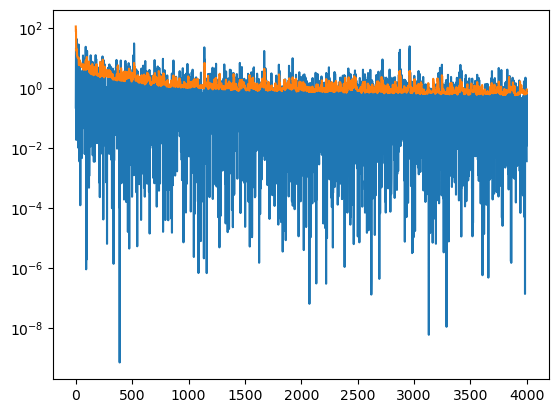

In [80]:
plotLossMSE(w_mse_sgd, loss_mse_sgd, y_train_test, tX_train_test)

In [81]:
y_pred = tX_train_test.dot(w_mse_sgd[-1])
y_pred = np.where(y_pred > 0, 1, -1)

_,_,_,_,f1 = f.confusion_matrix(y_train_test, y_pred)

print("Accuracy: ", np.sum(y_pred == y_train_test)/len(y_train_test))

print("F1 score: ", f1)

Accuracy:  0.5894161633592178
F1 score:  0.4940459313864474


In [82]:
y_test_sgd = tX_test.dot(w_mse_sgd[-1])
y_test_rounded_sgd = np.where(y_test_sgd > 0, 1, -1)

print('weights = \n', w_mse_sgd[-1],'\n Loss = ', loss_mse_sgd[-1],'\n*****************************************************************************',
      ' \n Train sample : \n', 'Heart attack rate = ', np.count_nonzero(y_train == 1)/len(y_train), '\n \n Test sample : \n', 'Heart attack rate = ', np.count_nonzero(y_test_rounded_sgd == 1)/len(y_test_rounded_sgd))

weights = 
 [ 1.11573575 -0.02262401 -0.06662782  0.04785737  0.8593002   0.78102103
 -0.48071372 -0.70276297 -0.06850756 -0.56944096 -0.13414413 -0.0250058
 -0.56852379  0.46900134 -0.44687142  0.8487253  -0.00709451  0.98343007
 -0.7986301   0.46472511 -0.71405065  0.53565178] 
 Loss =  0.0036711284385088864 
*****************************************************************************  
 Train sample : 
 Heart attack rate =  0.08830207079403295 
 
 Test sample : 
 Heart attack rate =  0.24253284451311494


3. Least squares

In [83]:
w_ls, loss_ls = f.least_squares(y_train_train, tX_train_train)

In [84]:
y_pred = tX_train_test.dot(w_ls)
y_pred = np.where(y_pred > 0, 1, -1)

_,_,_,_,f1 = f.confusion_matrix(y_train_test, y_pred)

print("Accuracy: ", np.sum(y_pred == y_train_test)/len(y_train_test))

print("F1 score: ", f1)

Accuracy:  0.7706068449813057
F1 score:  0.7779015370906661


In [85]:

y_test_ls = tX_test.dot(w_ls)
y_test_ls = np.where(y_test_ls > 0, 1, -1)

print('weights = \n', w_ls,'\n Loss = ', loss_ls,'\n*****************************************************************************',
      ' \n Train sample : \n', 'Heart attack rate = ', np.count_nonzero(y_train == 1)/len(y_train), '\n \n Test sample : \n', 'Heart attack rate = ', np.count_nonzero(y_test_ls == 1)/len(y_test_ls))

weights = 
 [-0.26212366  0.16214817  0.001177    0.00139231 -0.02964512 -0.03944538
 -0.23185505 -0.33937519 -0.07037331 -0.2468298  -0.00567709 -0.01720115
 -0.14126258 -0.12447874 -0.2483691   0.18457867  0.07125126 -0.09836726
  0.09744234 -0.01292019 -0.0063776  -0.0063678 ] 
 Loss =  0.31898642983936953 
*****************************************************************************  
 Train sample : 
 Heart attack rate =  0.08830207079403295 
 
 Test sample : 
 Heart attack rate =  0.30945611131935746


4. Ridge regression

In [98]:
w_ridge, loss_ridge = f.ridge_regression(y_train_train, tX_train_train, 0.2)

In [99]:
y_test_ridge = tX_test.dot(w_ridge)
y_test_ridge = np.where(y_test_ridge > 0, 1, -1)

print('weights = \n', w_ridge,'\n Loss = ', loss_ridge,'\n*****************************************************************************',
      ' \n Train sample : \n', 'Heart attack rate = ', np.count_nonzero(y_train == 1)/len(y_train), '\n \n Test sample : \n', 'Heart attack rate = ', np.count_nonzero(y_test_ridge == 1)/len(y_test_ridge))

weights = 
 [-0.03369243  0.10297796  0.00662819  0.00111429 -0.01808219 -0.02680741
 -0.119152   -0.09644003 -0.09925366 -0.11427922 -0.05412173 -0.03591432
 -0.07561305 -0.07301119 -0.13274258  0.02311154  0.07718318 -0.00649128
 -0.02014133 -0.00837351 -0.00492967 -0.00402232] 
 Loss =  0.33614110099127775 
*****************************************************************************  
 Train sample : 
 Heart attack rate =  0.08830207079403295 
 
 Test sample : 
 Heart attack rate =  0.3278234395999232


5. Logistic regression

In [101]:
y_train_processed_logreg = np.where(y_train_train == 1, 1, 0)
y_train_train_lg = np.where(y_train_train == 1, 1, 0)

In [140]:
w_logreg, loss_logreg = f.logistic_regression(y_train_train_lg, tX_train_train,initial_w,1000, 0.1)

Gradient Descent(999/999): loss=0.7198830905554637, w0=0.6879136248913457, w1=0.5949118600479766


In [141]:
y_pred = tX_train_test.dot(w_logreg[-1, :])
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.where(y_pred == 1, 1, -1)

_,_,_,_,f1 = f.confusion_matrix(y_train_test, y_pred)

print("Accuracy: ", np.sum(y_pred == y_train_test)/len(y_train_test))

print("F1 score: ", f1)

Accuracy:  0.6438884095484613
F1 score:  0.490578457993911


In [142]:
y_test_logreg = tX_test.dot(w_logreg[-1, :])
y_test_logreg = np.where(y_test_logreg > 0.5, 1, 0)

print('weights = \n', w_logreg[-1,:],'\n Loss = ', loss_logreg[-1],'\n*****************************************************************************',
        ' \n Train sample : \n', 'Heart attack rate = ', np.count_nonzero(y_train== 1)/len(y_train), '\n \n Test sample : \n', 'Heart attack rate = ', np.count_nonzero(y_test_logreg == 1)/len(y_test_logreg))

weights = 
 [ 0.68791362  0.59491186 -0.0148592  -0.02405817  0.59078638  0.29775118
 -1.21618327 -1.76308994 -0.42782865 -1.45203191 -0.22204886 -0.1608316
 -1.03001076 -0.43733057 -1.23270404  0.96724441  0.25350789  0.83411045
 -0.79822042  0.05115232 -0.47555601  0.10186887] 
 Loss =  0.7198830905554637 
*****************************************************************************  
 Train sample : 
 Heart attack rate =  0.08830207079403295 
 
 Test sample : 
 Heart attack rate =  0.08138673785644411


In [111]:
y_test_logreg = np.where(y_test_logreg == 1, 1, -1)
h.create_csv_submission(test_ids, y_test_logreg, 'submission_logreg.csv')

In [151]:
w_reg_logreg, loss_reg_logreg = f.reg_logistic_regression(y_train_processed_logreg, tX_train_train, 0.5, np.array(initial_w), 500, 0.1)

Gradient Descent(0/499): loss=3.357436338341679, w0=0.9865523856979913, w1=-0.8319848942484627
Gradient Descent(1/499): loss=2.334750381999612, w0=0.9612951320951524, w1=-0.7144603907266327
Gradient Descent(2/499): loss=1.988003654426145, w0=0.9143751189160024, w1=-0.6636726673866472
Gradient Descent(3/499): loss=1.6868183381489736, w0=0.8661897283272298, w1=-0.6241860251151005
Gradient Descent(4/499): loss=1.424590805173383, w0=0.8224320292103068, w1=-0.5803510857935563
Gradient Descent(5/499): loss=1.1947182388044084, w0=0.7796000903567106, w1=-0.541570344914193
Gradient Descent(6/499): loss=0.9980621310526969, w0=0.7400496034157836, w1=-0.5014281344743763
Gradient Descent(7/499): loss=0.8441140010741505, w0=0.7013885475134826, w1=-0.46644210954798276
Gradient Descent(8/499): loss=0.7472642002023265, w0=0.6667287064039132, w1=-0.4268273821712598
Gradient Descent(9/499): loss=0.7085773353776703, w0=0.6303868301946092, w1=-0.39893748106749516
Gradient Descent(10/499): loss=0.7622211918

In [152]:
y_pred = tX_train_test.dot(w_reg_logreg)
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.where(y_pred == 1, 1, -1)

_,_,_,_,f1 = f.confusion_matrix(y_train_test, y_pred)

print("Accuracy: ", np.sum(y_pred == y_train_test)/len(y_train_test))

print("F1 score: ", f1)

Accuracy:  0.531090020132298
F1 score:  0.6798366192757835


In [153]:
y_test_reg_logreg = tX_test.dot(w_reg_logreg)
y_test_reg_logreg = np.where(y_test_reg_logreg > 0.5, 1, 0)

print('weights = \n', w_reg_logreg,'\n Loss = ', loss_reg_logreg,'\n*****************************************************************************',
        ' \n Train sample : \n', 'Heart attack rate = ', np.count_nonzero(y_train== 1)/len(y_train), '\n \n Test sample : \n', 'Heart attack rate = ', np.count_nonzero(y_test_reg_logreg == 1)/len(y_test_reg_logreg))

weights = 
 [-0.00917584  0.21288369  0.38506364  0.16010529 -0.01373309 -0.00622924
 -0.10052114 -0.05696044 -0.13351661 -0.07252695 -0.06596427 -0.0719465
 -0.06936557 -0.06038476 -0.12316657  0.03060088  0.55660477  0.0008614
 -0.00178988  0.00175129  0.00513793  0.01785084] 
 Loss =  2.7221447991933774 
*****************************************************************************  
 Train sample : 
 Heart attack rate =  0.08830207079403295 
 
 Test sample : 
 Heart attack rate =  0.939339361303358


In [119]:
y_sub = np.where(y_test_reg_logreg == 1, 1, -1)
h.create_csv_submission(test_ids, y_sub, 'submission_reg_logreg2.csv')